## IMPORTS

In [86]:
%matplotlib inline
import pandas
from matplotlib import pyplot
import datetime
import re

## Getting data into the dataframe

In [87]:
stockData = pandas.read_csv("./tmp/Nifty_Data.csv" , parse_dates = ["Date"])
# stockData = stockData.set_index('Date')

FileNotFoundError: File b'./tmp/Nifty_Data.csv' does not exist

In [ ]:
stockData['Weekday'] = stockData['Date'].apply(lambda date : date.weekofyear)
pyplot.show()
stockData['Low'].describe()

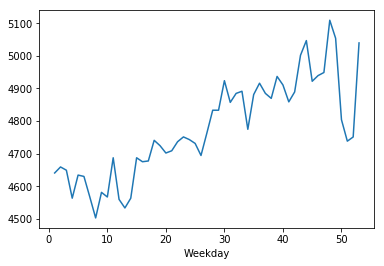

In [10]:
stockDataN = stockData.groupby(['Weekday']).mean()
((stockDataN['High'] + stockDataN['Low']) / 2).plot()

In [11]:
a = stockData.groupby(['Weekday']).mean()

In [85]:
a.head()

NameError: name 'a' is not defined

## Plotting Stock Data

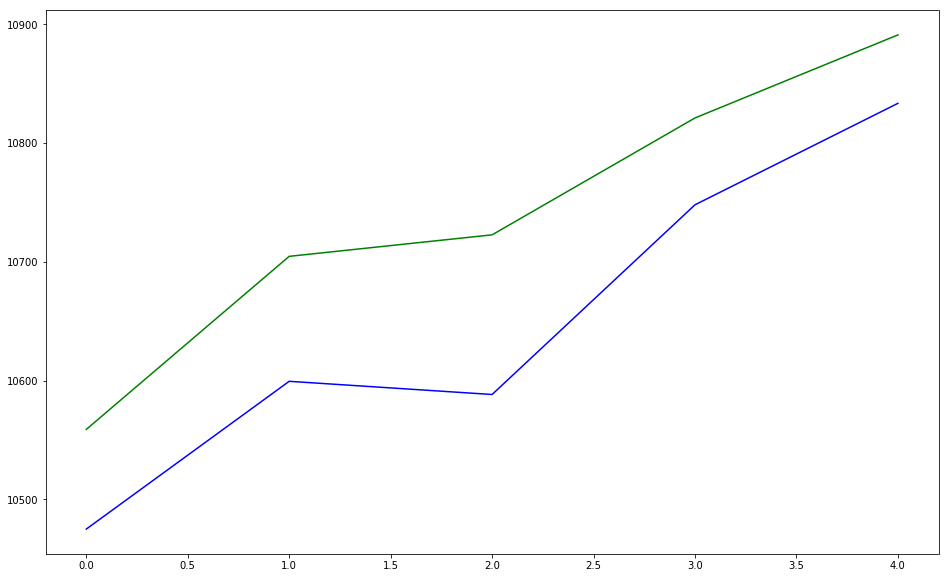

In [13]:
# print(stockData)
pyplot.rcParams["figure.figsize"] = [16,10]
stockData = stockData.head()
pyplot.plot(stockData.index , stockData.Low , 'B')
pyplot.plot(stockData.index , stockData.High , 'g')

## Plotting Average 

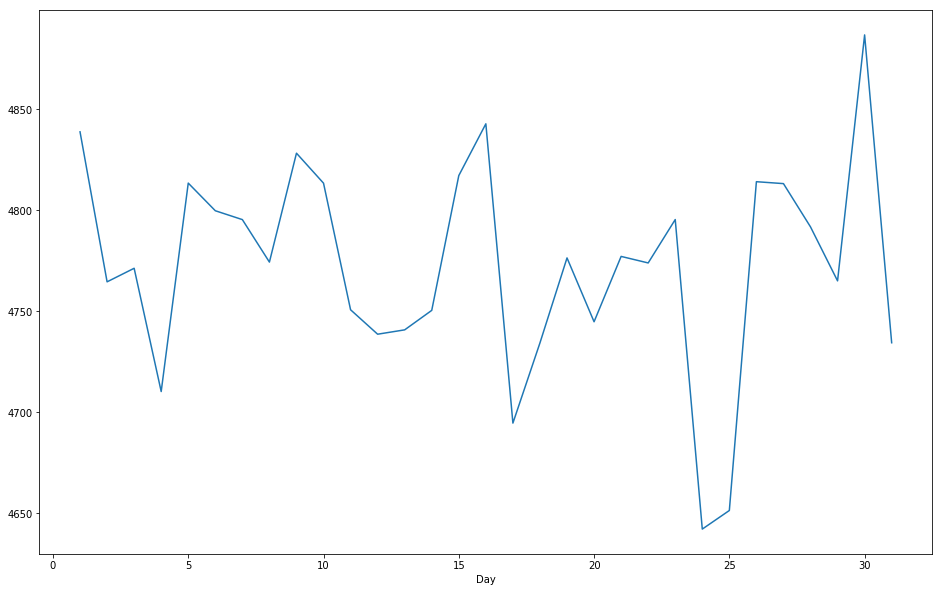

In [107]:
stockData['Day'] = stockData['Date'].apply(lambda date : date.day)
a = stockData.groupby(['Day']).mean()
((a['High'] + a['Low'])/2).plot()

In [2]:
df = pandas.read_csv("./tmp/all_stocks_5yr.csv")

In [3]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [20]:
frames = [ (df[df.Name == 'AAL']) , (df[df.Name == 'AAPL'])]
pandas.concat(frames).head(10)

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
5,2013-02-15,13.93,14.61,13.93,14.50,15628000,AAL
6,2013-02-19,14.33,14.56,14.08,14.26,11354400,AAL
7,2013-02-20,14.17,14.26,13.15,13.33,14725200,AAL
8,2013-02-21,13.62,13.95,12.90,13.37,11922100,AAL
9,2013-02-22,13.57,13.60,13.21,13.57,6071400,AAL


In [60]:
merged = df[df.Name == 'AAL'].merge(df[df.Name == 'GOOGL'] , how = "outer" , on = ['date','open']).head()
print(merged)

         date   open  high_x  low_x  close_x    volume_x Name_x  high_y  \
0  2013-02-08  15.07   15.12  14.63    14.75   8407500.0    AAL     NaN   
1  2013-02-11  14.89   15.01  14.26    14.46   8882000.0    AAL     NaN   
2  2013-02-12  14.45   14.51  14.10    14.27   8126000.0    AAL     NaN   
3  2013-02-13  14.30   14.94  14.25    14.66  10259500.0    AAL     NaN   
4  2013-02-14  14.94   14.96  13.16    13.99  31879900.0    AAL     NaN   

   low_y  close_y  volume_y Name_y  
0    NaN      NaN       NaN    NaN  
1    NaN      NaN       NaN    NaN  
2    NaN      NaN       NaN    NaN  
3    NaN      NaN       NaN    NaN  
4    NaN      NaN       NaN    NaN  


In [67]:
merged.rename(['date','LOL'])

TypeError: 'list' object is not callable

In [68]:
merged

,date,open,high_x,low_x,close_x,volume_x,Name_x,high_y,low_y,close_y,volume_y,Name_y
0,2013-02-08,15.07,15.12,14.63,14.75,8407500.0,AAL,NaN,NaN,NaN,NaN,NaN
1,2013-02-11,14.89,15.01,14.26,14.46,8882000.0,AAL,NaN,NaN,NaN,NaN,NaN
2,2013-02-12,14.45,14.51,14.10,14.27,8126000.0,AAL,NaN,NaN,NaN,NaN,NaN
3,2013-02-13,14.30,14.94,14.25,14.66,10259500.0,AAL,NaN,NaN,NaN,NaN,NaN
4,2013-02-14,14.94,14.96,13.16,13.99,31879900.0,AAL,NaN,NaN,NaN,NaN,NaN


In [84]:
[x.replace("_x","") for x in list(merged)]
    

['date',
 'open',
 'high',
 'low',
 'close',
 'volume',
 'Name',
 'high_y',
 'low_y',
 'close_y',
 'volume_y',
 'Name_y']